In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [113]:
def disp(img, name = ''):
    plt.figure(figsize = (10, 10))
    if len(img.shape) > 2 and img.shape[2] == 3:
        to_disp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(to_disp)
    else:
        plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(name)
    plt.show()

def disp_window(img, name = 'Image'):
    cv2.imshow(name, img)
    cv2.waitKey()  # 0 передавать в аргументы не обязательно
    cv2.destroyAllWindows()
    
def disp_keypoints(img, keypoints, name):
    disp(cv2.drawKeypoints(img.copy(), keypoints, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS), name)
    
def disp_matches(img1, desc1, img2, desc2, matches, name = ''):
    match = cv2.drawMatches(img1, desc1[0], img2, desc2[0], matches, None, flags = 0,
                            matchColor = (0, 255, 0), singlePointColor = (0, 0, 255))
    disp(match, name)

In [48]:
threshold = 75

Изображение для фичеринга

In [22]:
img_building = cv2.imread('stroganovy.jpg')
img_building_g = cv2.cvtColor(img_building, cv2.COLOR_BGR2GRAY)

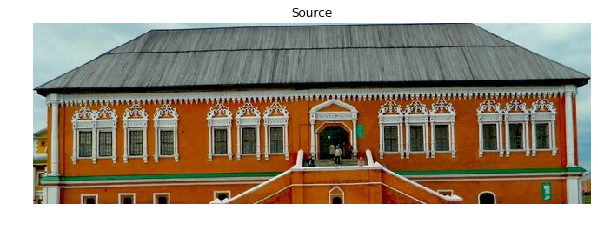

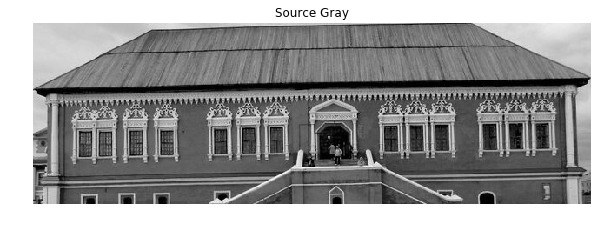

In [80]:
disp(img_building, 'Source')
disp(img_building_g, 'Source Gray')

#### Поиск ключевых точек

##### FAST

In [96]:
def get_keypoints_FAST(img, threshold):
    fast = cv2.FastFeatureDetector_create(threshold)
    return fast.detect(img)

Keypoints count: 438


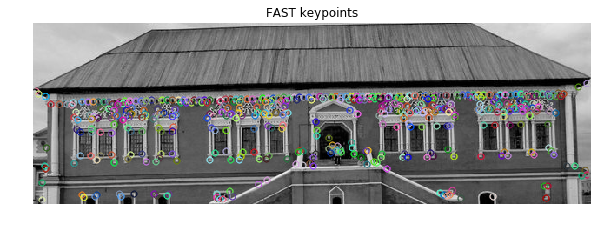

In [90]:
fast_keypoints = get_keypoints_FAST(img_building_g, threshold)
print(f'Keypoints count: {len(fast_keypoints)}')
disp_keypoints(img_building_g, fast_keypoints, 'FAST keypoints')

##### SIFT

In [94]:
def get_keypoints_SIFT(img, threshold):
    sift = cv2.xfeatures2d.SIFT_create(threshold)
    return sift.detect(img)

Keypoints count: 75


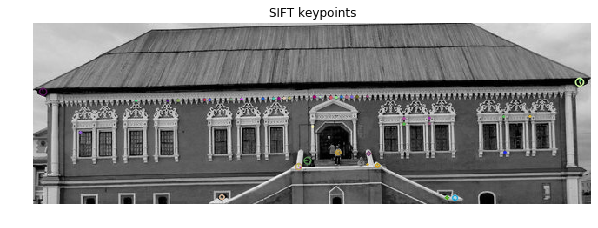

In [95]:
sift_keypoints = get_keypoints_SIFT(img_building_g, threshold)
print(f'Keypoints count: {len(sift_keypoints)}')
disp_keypoints(img_building_g, sift_keypoints, 'SIFT keypoints')

##### Harris

In [97]:
def get_keypoints_Harris(img, threshold):
    responses = cv2.cornerHarris(img, 2, 3, .04)
    harris_keypoints = []
    for x in (-responses.flatten()).argsort()[:threshold]:
        indices = np.unravel_index(x, responses.shape)
        harris_keypoints.append(cv2.KeyPoint(indices[1], indices[0], 10))
    return harris_keypoints

Keypoints count: 75


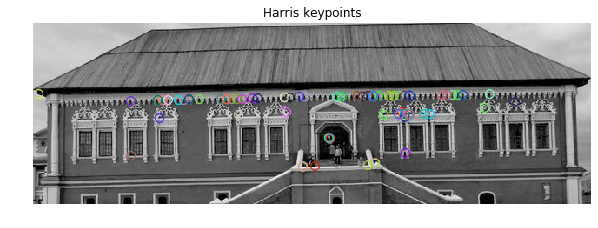

In [98]:
harris_keypoints = get_keypoints_Harris(img_building_g, threshold)
print(f'Keypoints count: {len(harris_keypoints)}')
disp_keypoints(img_building_g, harris_keypoints, 'Harris keypoints')

#### Дескрипторы

##### SIFT

In [101]:
def get_desc_SIFT(img, keypoints):
    sift = cv2.xfeatures2d.SIFT_create()
    return sift.compute(img, keypoints)

In [103]:
fast_sift_desc = get_desc_SIFT(img_building_g, fast_keypoints)
sift_desc = get_desc_SIFT(img_building_g, sift_keypoints)
harris_sift_desc = get_desc_SIFT(img_building_g, harris_keypoints)

##### BRIEF

In [102]:
def get_desc_BRIEF(img, keypoints):
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    return brief.compute(img, keypoints)

In [110]:
fast_brief_desc = get_desc_BRIEF(img_building_g, fast_keypoints)
sift_brief_desc = get_desc_BRIEF(img_building_g, sift_keypoints)
harris_brief_desc = get_desc_BRIEF(img_building_g, harris_keypoints)

#### Общие точки

In [105]:
def get_matches(desc1, desc2):
    bf = cv2.BFMatcher()
    return bf.match(desc1[1], desc2[1])

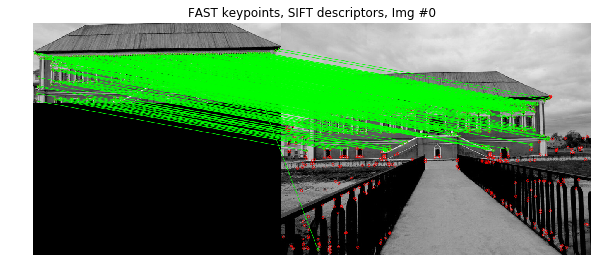

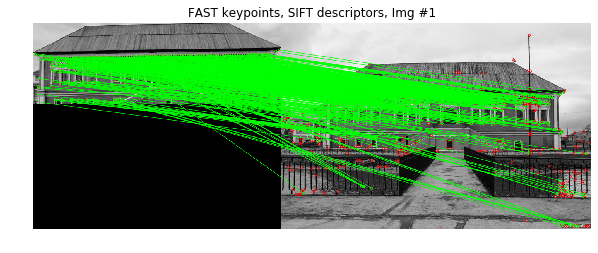

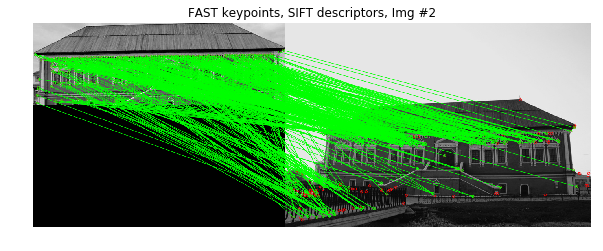

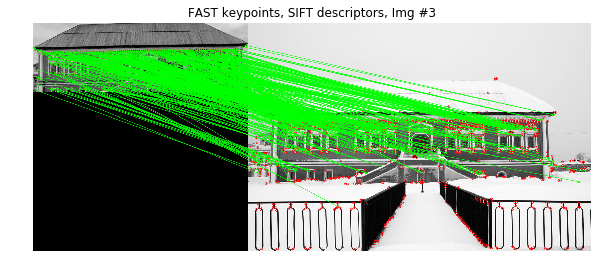

In [114]:
for i in range(4):
    img = cv2.imread(f'stroganovy{i}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp = get_keypoints_FAST(img, threshold)
    desc = get_desc_SIFT(img, kp)
    matches = get_matches(fast_sift_desc, desc)
    disp_matches(img_building_g, fast_sift_desc, img, desc, matches, f'FAST keypoints, SIFT descriptors, Img #{i}')

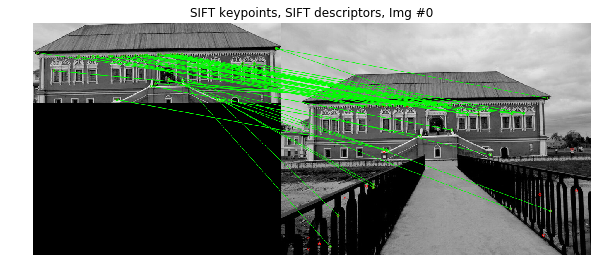

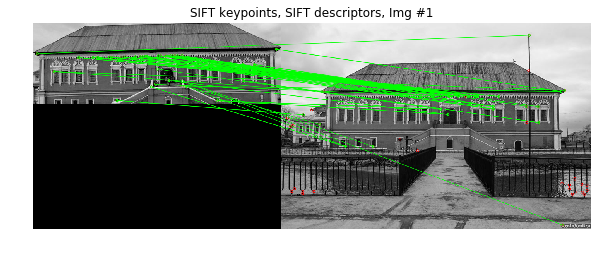

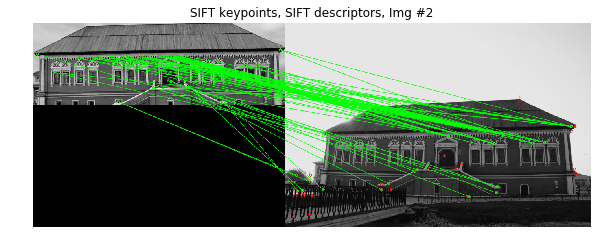

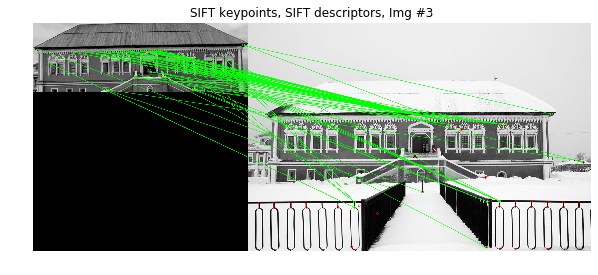

In [115]:
for i in range(4):
    img = cv2.imread(f'stroganovy{i}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp = get_keypoints_SIFT(img, threshold)
    desc = get_desc_SIFT(img, kp)
    matches = get_matches(sift_desc, desc)
    disp_matches(img_building_g, sift_desc, img, desc, matches, f'SIFT keypoints, SIFT descriptors, Img #{i}')

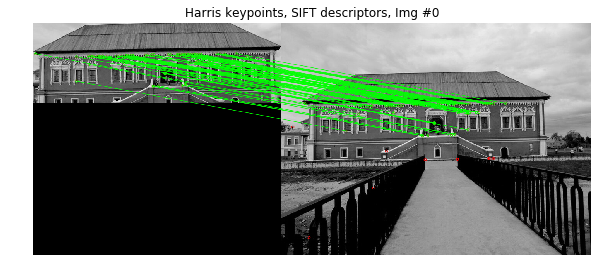

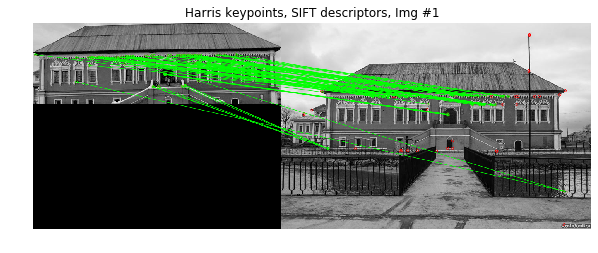

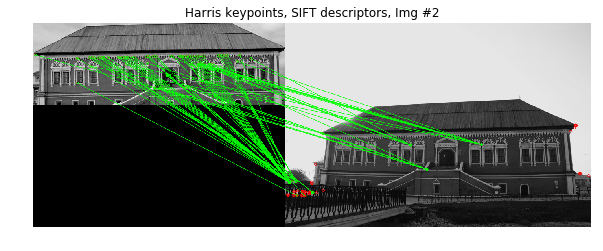

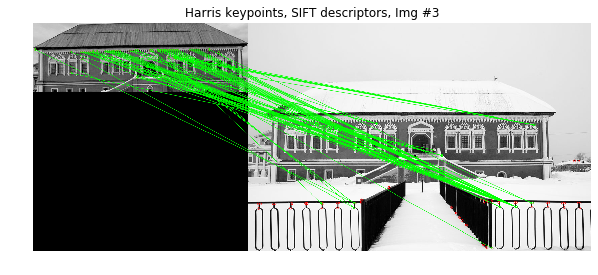

In [116]:
for i in range(4):
    img = cv2.imread(f'stroganovy{i}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp = get_keypoints_Harris(img, threshold)
    desc = get_desc_SIFT(img, kp)
    matches = get_matches(harris_sift_desc, desc)
    disp_matches(img_building_g, harris_sift_desc, img, desc, matches, f'Harris keypoints, SIFT descriptors, Img #{i}')

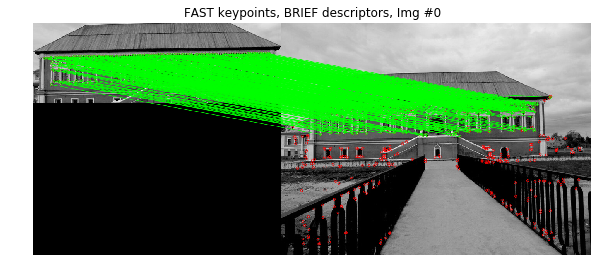

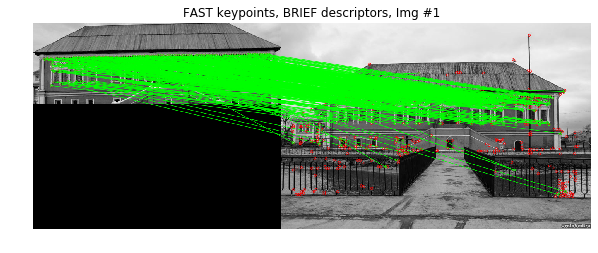

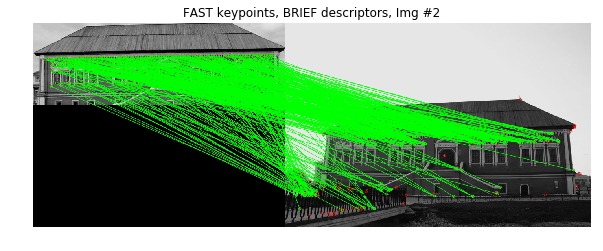

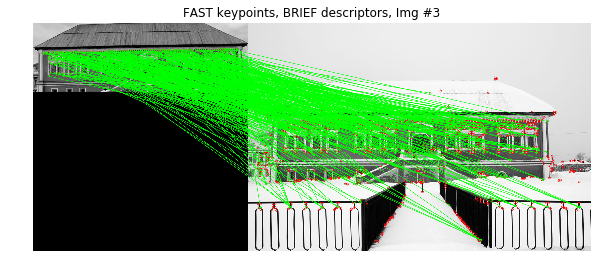

In [117]:
for i in range(4):
    img = cv2.imread(f'stroganovy{i}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp = get_keypoints_FAST(img, threshold)
    desc = get_desc_BRIEF(img, kp)
    matches = get_matches(fast_brief_desc, desc)
    disp_matches(img_building_g, fast_brief_desc, img, desc, matches, f'FAST keypoints, BRIEF descriptors, Img #{i}')

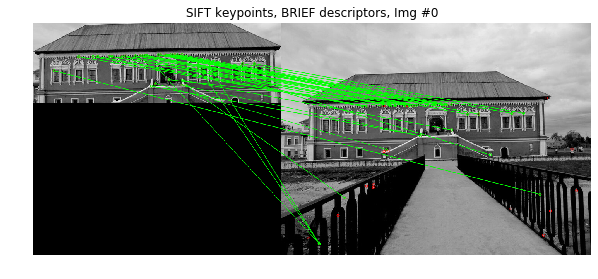

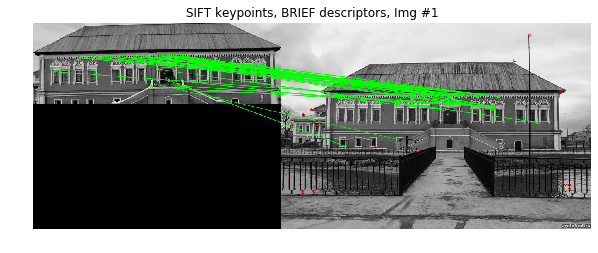

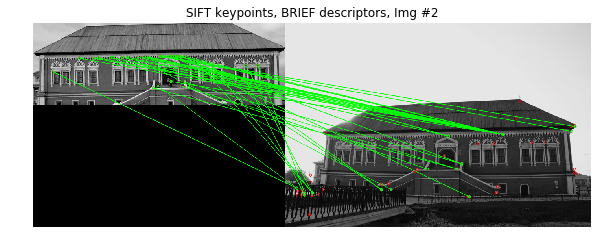

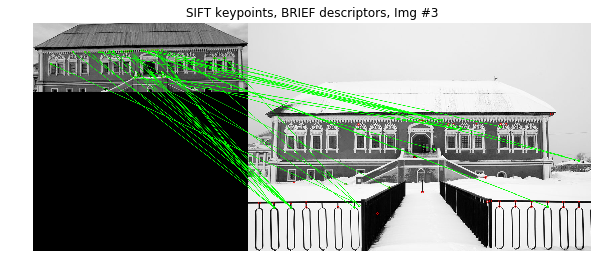

In [118]:
for i in range(4):
    img = cv2.imread(f'stroganovy{i}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp = get_keypoints_SIFT(img, threshold)
    desc = get_desc_BRIEF(img, kp)
    matches = get_matches(sift_brief_desc, desc)
    disp_matches(img_building_g, sift_brief_desc, img, desc, matches, f'SIFT keypoints, BRIEF descriptors, Img #{i}')

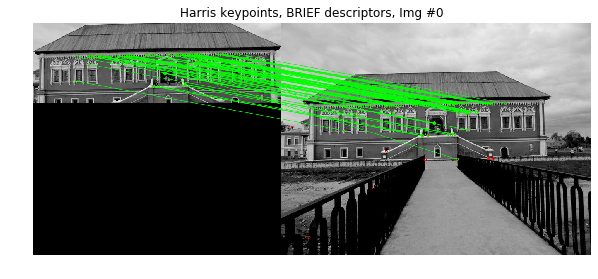

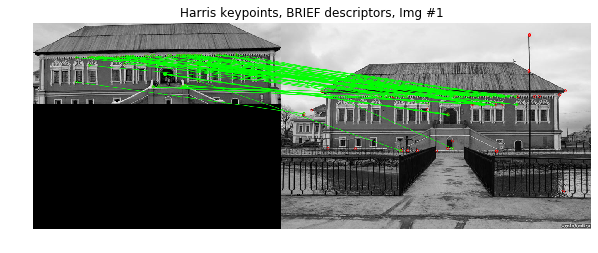

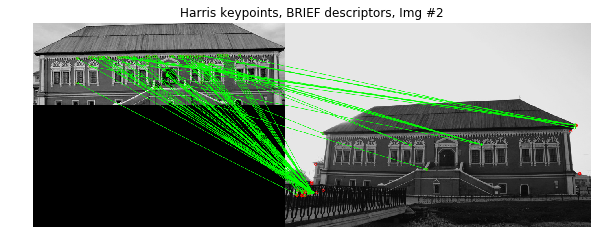

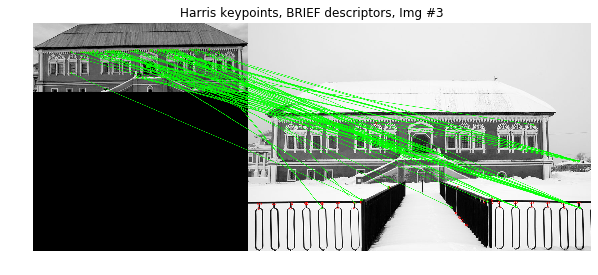

In [119]:
for i in range(4):
    img = cv2.imread(f'stroganovy{i}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp = get_keypoints_Harris(img, threshold)
    desc = get_desc_BRIEF(img, kp)
    matches = get_matches(harris_brief_desc, desc)
    disp_matches(img_building_g, harris_brief_desc, img, desc, matches, f'Harris keypoints, BRIEF descriptors, Img #{i}')

In [123]:
face = cv2.imread('Dostoevsky_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
full = cv2.imread('Dostoevsky.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2GRAY)

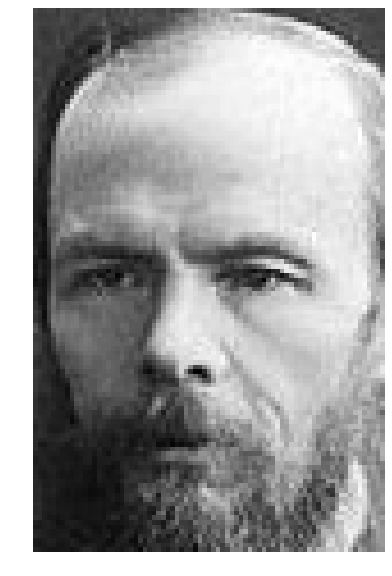

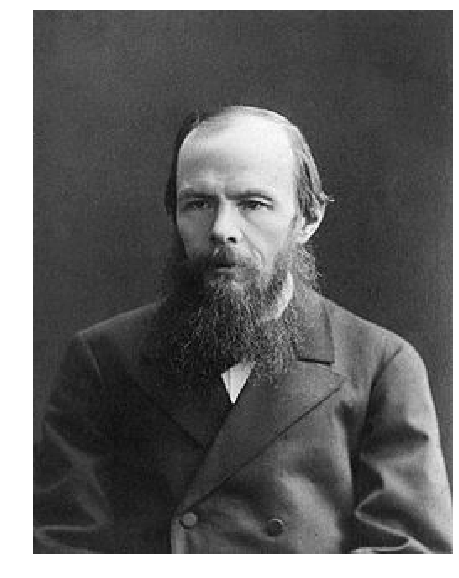

In [124]:
disp(face)
disp(full)

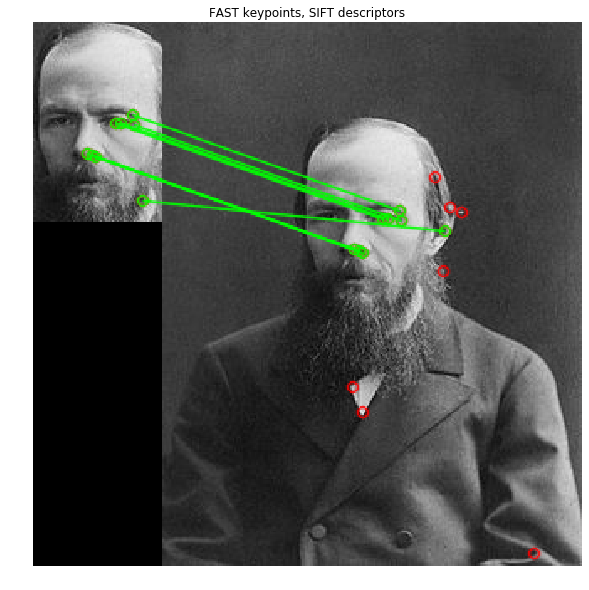

In [125]:
face_kp = get_keypoints_FAST(face, threshold)
face_desc = get_desc_SIFT(face, face_kp)
full_kp = get_keypoints_FAST(full, threshold)
full_desc = get_desc_SIFT(full, full_kp)
matches = get_matches(face_desc, full_desc)
disp_matches(face, face_desc, full, full_desc, matches, 'FAST keypoints, SIFT descriptors')

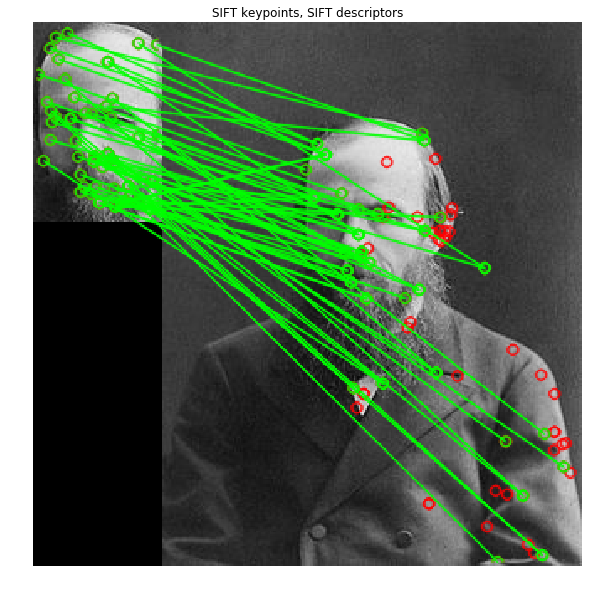

In [126]:
face_kp = get_keypoints_SIFT(face, threshold)
face_desc = get_desc_SIFT(face, face_kp)
full_kp = get_keypoints_SIFT(full, threshold)
full_desc = get_desc_SIFT(full, full_kp)
matches = get_matches(face_desc, full_desc)
disp_matches(face, face_desc, full, full_desc, matches, 'SIFT keypoints, SIFT descriptors')

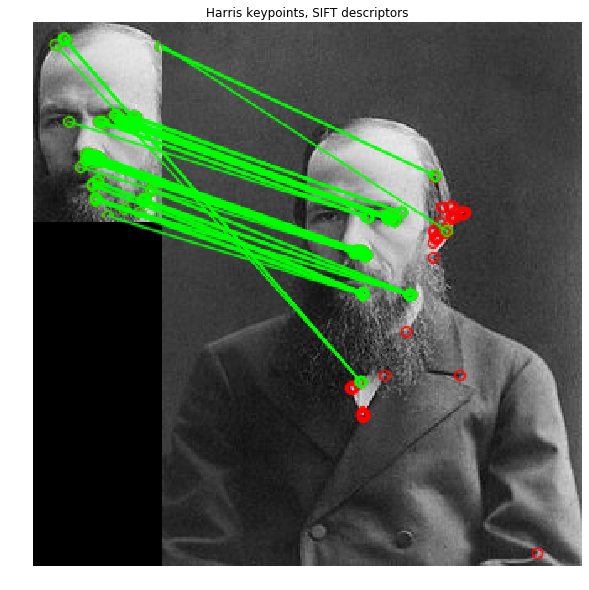

In [127]:
face_kp = get_keypoints_Harris(face, threshold)
face_desc = get_desc_SIFT(face, face_kp)
full_kp = get_keypoints_Harris(full, threshold)
full_desc = get_desc_SIFT(full, full_kp)
matches = get_matches(face_desc, full_desc)
disp_matches(face, face_desc, full, full_desc, matches, 'Harris keypoints, SIFT descriptors')

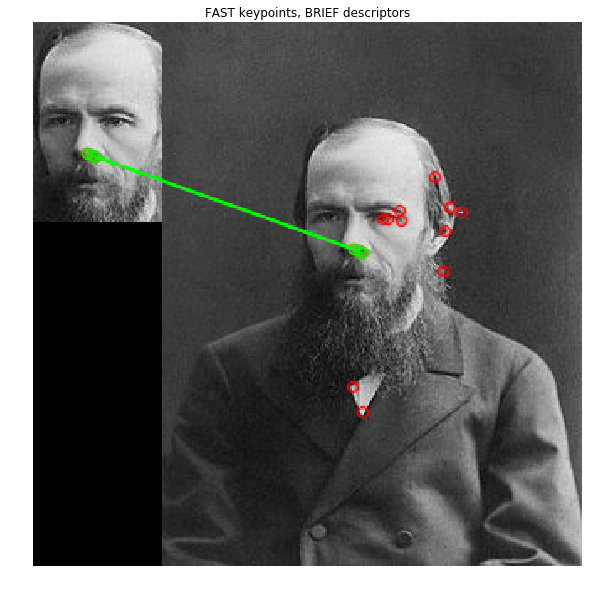

In [128]:
face_kp = get_keypoints_FAST(face, threshold)
face_desc = get_desc_BRIEF(face, face_kp)
full_kp = get_keypoints_FAST(full, threshold)
full_desc = get_desc_BRIEF(full, full_kp)
matches = get_matches(face_desc, full_desc)
disp_matches(face, face_desc, full, full_desc, matches, 'FAST keypoints, BRIEF descriptors')

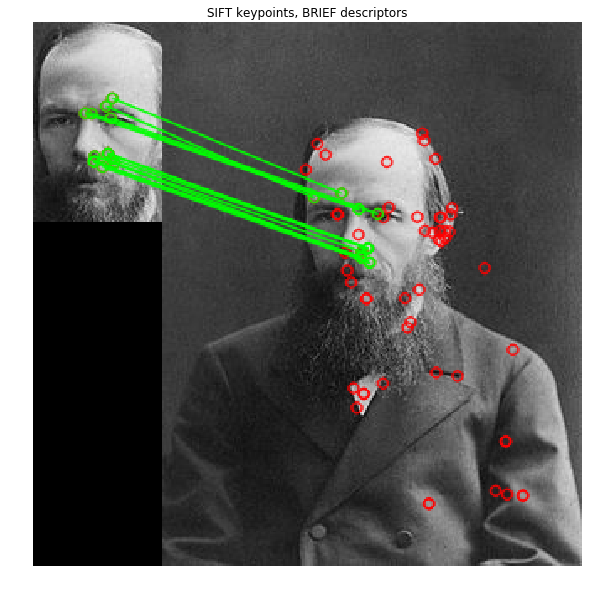

In [129]:
face_kp = get_keypoints_SIFT(face, threshold)
face_desc = get_desc_BRIEF(face, face_kp)
full_kp = get_keypoints_SIFT(full, threshold)
full_desc = get_desc_BRIEF(full, full_kp)
matches = get_matches(face_desc, full_desc)
disp_matches(face, face_desc, full, full_desc, matches, 'SIFT keypoints, BRIEF descriptors')

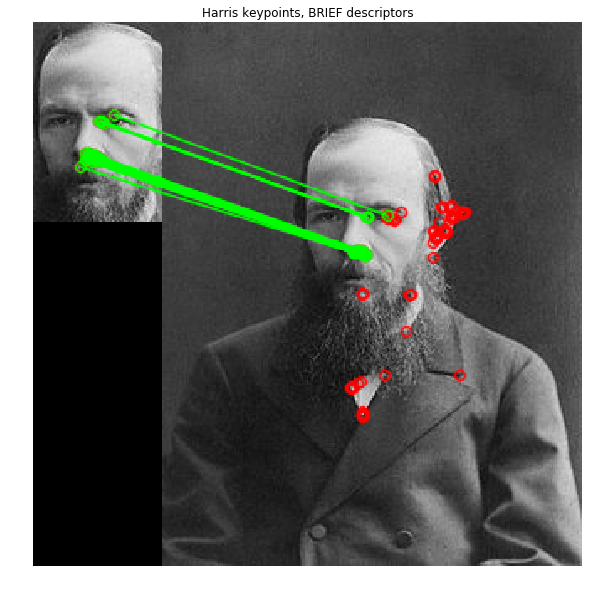

In [130]:
face_kp = get_keypoints_Harris(face, threshold)
face_desc = get_desc_BRIEF(face, face_kp)
full_kp = get_keypoints_Harris(full, threshold)
full_desc = get_desc_BRIEF(full, full_kp)
matches = get_matches(face_desc, full_desc)
disp_matches(face, face_desc, full, full_desc, matches, 'Harris keypoints, BRIEF descriptors')